In [27]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [28]:
lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

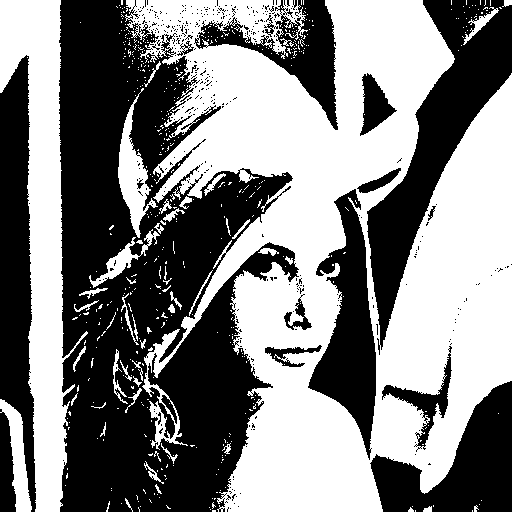

In [29]:
binarize_lena = lena_gray//128*255
cv2_imshow(binarize_lena)

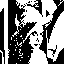

In [30]:
binarize64_lena = np.zeros((64,64))
for r in range(64):
  for c in range(64):
    binarize64_lena[r,c] = binarize_lena[r*8,c*8]
cv2_imshow(binarize64_lena)

In [31]:
def h(b,c,d,e):
  if b != c:
    return 's'
  else:
    if d==b and e==b:
      return 'r'
    else:
      return 'q'

In [32]:
def f(mtx):
  mtx_list = mtx.reshape(-1)
  qvalue = 0
  rvalue = 0
  for ads in [[4,5,2,1],[4,1,0,3],[4,3,6,7],[4,7,8,5]]:
    state = h(*mtx_list[ads])
    qvalue += 1 if state=='q' else 0
    rvalue += 1 if state=='r' else 0
  if rvalue==4:
    return 5
  else:
    return qvalue

In [33]:
def y(mtx):
  mtx_list = mtx.reshape(-1)
  if mtx_list[4] == 1:
    if 1 in mtx_list[[1,3,5,7]]:
      return 'p'
  return 'q'

In [34]:
def f2(mtx):
  mtx_list = mtx.reshape(-1)
  qvalue = 0
  rvalue = 0
  for ads in [[4,5,2,1],[4,1,0,3],[4,3,6,7],[4,7,8,5]]:
    state = h(*mtx_list[ads])
    qvalue += 1 if state=='q' else 0
  if qvalue==1:
    return 0
  else:
    return 255

In [35]:
def thinning_one_step(org_lena):
  check_table = np.zeros((66,66))
  check_table[1:-1,1:-1] = org_lena
  img = np.zeros((650, 650, 3), np.uint8)
  img.fill(255)
  result = np.zeros((64,64))
  for r in range(64):
    for c in range(64):
      if check_table[r+1,c+1]>254:
        result[r,c] = int(np.around(f(check_table[r:r+3,c:c+3])))
  check_table2 = np.zeros((66,66))
  check_table2[1:-1,1:-1] = result
  img2 = np.zeros((650, 650, 3), np.uint8)
  img2.fill(255)
  result2 = np.zeros((64,64),str)
  for r in range(64):
    for c in range(64):
      if check_table2[r+1,c+1]>0.5:
        result2[r,c] = y(check_table2[r:r+3,c:c+3])
  new_lena = check_table[1:-1,1:-1]
  for r in range(64):
    for c in range(64):
      if result2[r,c]=='p':
        new_lena[r,c] = f2(check_table[r:r+3,c:c+3])
  return new_lena

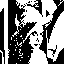

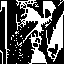

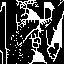

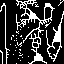

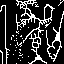

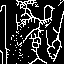

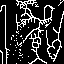

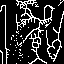

In [36]:
org_lena = binarize64_lena
cv2_imshow(org_lena)
new_lena = thinning_one_step(org_lena)
cv2_imshow(new_lena)
while not np.array_equal(org_lena, new_lena):
  org_lena = new_lena
  new_lena = thinning_one_step(org_lena)
  cv2_imshow(new_lena)

In [39]:
%%writefile /content/drive/MyDrive/CVHW/HW7.py
import cv2
import numpy as np

lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
binarize_lena = lena_gray//128*255

binarize64_lena = np.zeros((64,64))
for r in range(64):
  for c in range(64):
    binarize64_lena[r,c] = binarize_lena[r*8,c*8]

def h(b,c,d,e):
  if b != c:
    return 's'
  else:
    if d==b and e==b:
      return 'r'
    else:
      return 'q'

def f(mtx):
  mtx_list = mtx.reshape(-1)
  qvalue = 0
  rvalue = 0
  for ads in [[4,5,2,1],[4,1,0,3],[4,3,6,7],[4,7,8,5]]:
    state = h(*mtx_list[ads])
    qvalue += 1 if state=='q' else 0
    rvalue += 1 if state=='r' else 0
  if rvalue==4:
    return 5
  else:
    return qvalue

def y(mtx):
  mtx_list = mtx.reshape(-1)
  if mtx_list[4] == 1:
    if 1 in mtx_list[[1,3,5,7]]:
      return 'p'
  return 'q'

def f2(mtx):
  mtx_list = mtx.reshape(-1)
  qvalue = 0
  rvalue = 0
  for ads in [[4,5,2,1],[4,1,0,3],[4,3,6,7],[4,7,8,5]]:
    state = h(*mtx_list[ads])
    qvalue += 1 if state=='q' else 0
  if qvalue==1:
    return 0
  else:
    return 255

def thinning_one_step(org_lena):
  check_table = np.zeros((66,66))
  check_table[1:-1,1:-1] = org_lena
  result = np.zeros((64,64))
  for r in range(64):
    for c in range(64):
      if check_table[r+1,c+1]>254:
        result[r,c] = int(np.around(f(check_table[r:r+3,c:c+3])))
  check_table2 = np.zeros((66,66))
  check_table2[1:-1,1:-1] = result
  result2 = np.zeros((64,64),str)
  for r in range(64):
    for c in range(64):
      if check_table2[r+1,c+1]>0.5:
        result2[r,c] = y(check_table2[r:r+3,c:c+3])
  new_lena = check_table[1:-1,1:-1]
  for r in range(64):
    for c in range(64):
      if result2[r,c]=='p':
        new_lena[r,c] = f2(check_table[r:r+3,c:c+3])
  return new_lena

org_lena = binarize64_lena
new_lena = thinning_one_step(org_lena)
while not np.array_equal(org_lena, new_lena):
  org_lena = new_lena
  new_lena = thinning_one_step(org_lena)

cv2.imwrite('new_lena.bmp', new_lena)

Overwriting /content/drive/MyDrive/CVHW/HW7.py
